In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
import torch
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import graft
import torch_geometric


In [2]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [3]:
s = fraudTrain.cc_num.value_counts().sort_values().reset_index()
cc = s.iloc[56:100,0]

In [4]:
cc_num = fraudTrain[fraudTrain.cc_num.isin(cc)]

In [5]:
cc_num_count = cc_num.groupby('cc_num')['is_fraud'].agg(['count','sum'])

In [6]:
def compute_time_difference(group):
    n = len(group)
    result = []
    for i in range(n):
        for j in range(n):
            time_difference = abs(group.iloc[i].trans_date_trans_time.value - group.iloc[j].trans_date_trans_time.value)
            result.append([group.iloc[i].name, group.iloc[j].name, time_difference])
    return result


In [7]:
def plot_cc_graph(cc_tt, cc_num):
    groups = cc_tt[cc_tt['cc_num'] == cc_num]
    
    edge_index = compute_time_difference(groups)
    edge_index = (np.array(edge_index)).astype(np.float64)
    edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
    theta = edge_index[:,2].mean()
    #theta = 1e7
    edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
    edge_index = edge_index.tolist()
    
    selected_indices1 = cc_tt[cc_tt['cc_num'] ==  cc_num].index
    is_fraud_values1 = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    g = torch_geometric.data.Data(
        edge_index = np.array(edge_index)[:,:2],
        edge_attr = np.array(edge_index)[:,-1],  # weight
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    
    
    unique_nodes = set(g.edge_index.reshape(-1).tolist())
    dict_map = {n:i for i,n in enumerate(unique_nodes)}
    source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
    edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])
    
    g = torch_geometric.data.Data(
        edge_index = edge_index_selected2,
        edge_attr = np.array(edge_index)[:,-1],
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    dr_opts = { 
        'output_size': (500,500),
        'edge_marker_size': 1,
      #'output':"ten-nodes.pdf",
    }
    graft.graph.plot_undirected_weighted(
        g,
        node_color=g.y,
        node_size=g.x,
        edge_weight_text=False,
        edge_weight_width_scale=3.0,
        draw_options= dr_opts,
    )
    


# 6.762340e+11	

In [8]:
cc_num =  6.762340e+11
s = fraudTrain[fraudTrain['cc_num'] == 6.762340e+11]

In [9]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.025, 10, 400)

In [10]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

,trans_date_trans_time,amt
43548,2019-01-27 01:34:00,329.83
43755,2019-01-27 04:43:00,298.01
45318,2019-01-27 22:35:00,1043.38
45352,2019-01-27 22:53:00,1189.69
45384,2019-01-27 23:11:00,289.80
45388,2019-01-27 23:12:00,795.01
45476,2019-01-28 00:07:00,296.87
45605,2019-01-28 01:51:00,294.02
45738,2019-01-28 03:29:00,321.49
47720,2019-01-28 22:54:00,287.42


In [11]:
cc_tt = s[('2019-01-28' < s['trans_date_trans_time']) & (s['trans_date_trans_time'] < '2019-02-08')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.4)

In [12]:
groups = cc_tt[cc_tt['cc_num'] == cc_num]

In [13]:
edge_index = compute_time_difference(groups)

In [14]:
edge_index

[[45476, 45476, 0],
 [45476, 45605, 6240000000000],
 [45476, 45738, 12120000000000],
 [45476, 47720, 82020000000000],
 [45476, 50408, 193860000000000],
 [45476, 56201, 556800000000000],
 [45476, 62012, 770280000000000],
 [45476, 62066, 771900000000000],
 [45476, 63016, 839640000000000],
 [45476, 64226, 927240000000000],
 [45605, 45476, 6240000000000],
 [45605, 45605, 0],
 [45605, 45738, 5880000000000],
 [45605, 47720, 75780000000000],
 [45605, 50408, 187620000000000],
 [45605, 56201, 550560000000000],
 [45605, 62012, 764040000000000],
 [45605, 62066, 765660000000000],
 [45605, 63016, 833400000000000],
 [45605, 64226, 921000000000000],
 [45738, 45476, 12120000000000],
 [45738, 45605, 5880000000000],
 [45738, 45738, 0],
 [45738, 47720, 69900000000000],
 [45738, 50408, 181740000000000],
 [45738, 56201, 544680000000000],
 [45738, 62012, 758160000000000],
 [45738, 62066, 759780000000000],
 [45738, 63016, 827520000000000],
 [45738, 64226, 915120000000000],
 [47720, 45476, 82020000000000],
 [

In [15]:
edge_index = (np.array(edge_index)).astype(np.float64)
edge_index

array([[4.5476e+04, 4.5476e+04, 0.0000e+00],
       [4.5476e+04, 4.5605e+04, 6.2400e+12],
       [4.5476e+04, 4.5738e+04, 1.2120e+13],
       [4.5476e+04, 4.7720e+04, 8.2020e+13],
       [4.5476e+04, 5.0408e+04, 1.9386e+14],
       [4.5476e+04, 5.6201e+04, 5.5680e+14],
       [4.5476e+04, 6.2012e+04, 7.7028e+14],
       [4.5476e+04, 6.2066e+04, 7.7190e+14],
       [4.5476e+04, 6.3016e+04, 8.3964e+14],
       [4.5476e+04, 6.4226e+04, 9.2724e+14],
       [4.5605e+04, 4.5476e+04, 6.2400e+12],
       [4.5605e+04, 4.5605e+04, 0.0000e+00],
       [4.5605e+04, 4.5738e+04, 5.8800e+12],
       [4.5605e+04, 4.7720e+04, 7.5780e+13],
       [4.5605e+04, 5.0408e+04, 1.8762e+14],
       [4.5605e+04, 5.6201e+04, 5.5056e+14],
       [4.5605e+04, 6.2012e+04, 7.6404e+14],
       [4.5605e+04, 6.2066e+04, 7.6566e+14],
       [4.5605e+04, 6.3016e+04, 8.3340e+14],
       [4.5605e+04, 6.4226e+04, 9.2100e+14],
       [4.5738e+04, 4.5476e+04, 1.2120e+13],
       [4.5738e+04, 4.5605e+04, 5.8800e+12],
       [4.

In [17]:
np.array(edge_index)[:,1]

array([45476., 45605., 45738., 47720., 50408., 56201., 62012., 62066.,
       63016., 64226., 45476., 45605., 45738., 47720., 50408., 56201.,
       62012., 62066., 63016., 64226., 45476., 45605., 45738., 47720.,
       50408., 56201., 62012., 62066., 63016., 64226., 45476., 45605.,
       45738., 47720., 50408., 56201., 62012., 62066., 63016., 64226.,
       45476., 45605., 45738., 47720., 50408., 56201., 62012., 62066.,
       63016., 64226., 45476., 45605., 45738., 47720., 50408., 56201.,
       62012., 62066., 63016., 64226., 45476., 45605., 45738., 47720.,
       50408., 56201., 62012., 62066., 63016., 64226., 45476., 45605.,
       45738., 47720., 50408., 56201., 62012., 62066., 63016., 64226.,
       45476., 45605., 45738., 47720., 50408., 56201., 62012., 62066.,
       63016., 64226., 45476., 45605., 45738., 47720., 50408., 56201.,
       62012., 62066., 63016., 64226.])

In [15]:
edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
edge_index

array([[4.5476e+04, 4.5605e+04, 6.2400e+12],
       [4.5476e+04, 4.5738e+04, 1.2120e+13],
       [4.5476e+04, 4.7720e+04, 8.2020e+13],
       [4.5476e+04, 5.0408e+04, 1.9386e+14],
       [4.5476e+04, 5.6201e+04, 5.5680e+14],
       [4.5476e+04, 6.2012e+04, 7.7028e+14],
       [4.5476e+04, 6.2066e+04, 7.7190e+14],
       [4.5476e+04, 6.3016e+04, 8.3964e+14],
       [4.5476e+04, 6.4226e+04, 9.2724e+14],
       [4.5605e+04, 4.5476e+04, 6.2400e+12],
       [4.5605e+04, 4.5738e+04, 5.8800e+12],
       [4.5605e+04, 4.7720e+04, 7.5780e+13],
       [4.5605e+04, 5.0408e+04, 1.8762e+14],
       [4.5605e+04, 5.6201e+04, 5.5056e+14],
       [4.5605e+04, 6.2012e+04, 7.6404e+14],
       [4.5605e+04, 6.2066e+04, 7.6566e+14],
       [4.5605e+04, 6.3016e+04, 8.3340e+14],
       [4.5605e+04, 6.4226e+04, 9.2100e+14],
       [4.5738e+04, 4.5476e+04, 1.2120e+13],
       [4.5738e+04, 4.5605e+04, 5.8800e+12],
       [4.5738e+04, 4.7720e+04, 6.9900e+13],
       [4.5738e+04, 5.0408e+04, 1.8174e+14],
       [4.

In [19]:
theta = edge_index[:,2].mean()
theta

408111600000000.0

In [24]:
408111600000000 > 1e14

True

In [28]:
edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
edge_index = edge_index.tolist()
edge_index

[[45476.0, 45476.0, 0.0],
 [45476.0, 45605.0, 0.9848263621802892],
 [45476.0, 45738.0, 0.9707388861682089],
 [45476.0, 47720.0, 0.8179333381989178],
 [45476.0, 50408.0, 0.6218744051154429],
 [45476.0, 56201.0, 0.2555511490921111],
 [45476.0, 62012.0, 0.15146133361894445],
 [45476.0, 62066.0, 0.15086129918957064],
 [45476.0, 63016.0, 0.12778853865312714],
 [45476.0, 64226.0, 0.1031031234576533],
 [45605.0, 45476.0, 0.9848263621802892],
 [45605.0, 45605.0, 0.0],
 [45605.0, 45738.0, 0.9856954722648851],
 [45605.0, 47720.0, 0.8305355843522609],
 [45605.0, 50408.0, 0.631455888059989],
 [45605.0, 56201.0, 0.25948853412732686],
 [45605.0, 62012.0, 0.15379496268116438],
 [45605.0, 62066.0, 0.15318568326662332],
 [45605.0, 63016.0, 0.1297574309142359],
 [45605.0, 64226.0, 0.10469167704791656],
 [45738.0, 45476.0, 0.9707388861682089],
 [45738.0, 45605.0, 0.9856954722648851],
 [45738.0, 45738.0, 0.0],
 [45738.0, 47720.0, 0.842588413685106],
 [45738.0, 50408.0, 0.6406196496054295],
 [45738.0, 5620

In [29]:
selected_indices1 = cc_tt[cc_tt['cc_num'] ==  cc_num].index
selected_indices1

Index([45476, 45605, 45738, 47720, 50408, 56201, 62012, 62066, 63016, 64226], dtype='int64')

In [40]:
is_fraud_values1 = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
is_fraud_values1

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [41]:
    g = torch_geometric.data.Data(
        edge_index = np.array(edge_index)[:,:2],
        edge_attr = np.array(edge_index)[:,-1],  # weight
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )

In [45]:
g

Data(x=[10], edge_index=[100, 2], edge_attr=[100], y=[10])

In [46]:
unique_nodes = set(g.edge_index.reshape(-1).tolist())
unique_nodes

{45476.0,
 45605.0,
 45738.0,
 47720.0,
 50408.0,
 56201.0,
 62012.0,
 62066.0,
 63016.0,
 64226.0}

In [47]:
dict_map = {n:i for i,n in enumerate(unique_nodes)}
dict_map

{64226.0: 0,
 45476.0: 1,
 45605.0: 2,
 47720.0: 3,
 50408.0: 4,
 45738.0: 5,
 56201.0: 6,
 63016.0: 7,
 62066.0: 8,
 62012.0: 9}

In [48]:
source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
source, target

(array([45476., 45476., 45476., 45476., 45476., 45476., 45476., 45476.,
        45476., 45476., 45605., 45605., 45605., 45605., 45605., 45605.,
        45605., 45605., 45605., 45605., 45738., 45738., 45738., 45738.,
        45738., 45738., 45738., 45738., 45738., 45738., 47720., 47720.,
        47720., 47720., 47720., 47720., 47720., 47720., 47720., 47720.,
        50408., 50408., 50408., 50408., 50408., 50408., 50408., 50408.,
        50408., 50408., 56201., 56201., 56201., 56201., 56201., 56201.,
        56201., 56201., 56201., 56201., 62012., 62012., 62012., 62012.,
        62012., 62012., 62012., 62012., 62012., 62012., 62066., 62066.,
        62066., 62066., 62066., 62066., 62066., 62066., 62066., 62066.,
        63016., 63016., 63016., 63016., 63016., 63016., 63016., 63016.,
        63016., 63016., 64226., 64226., 64226., 64226., 64226., 64226.,
        64226., 64226., 64226., 64226.]),
 array([45476., 45605., 45738., 47720., 50408., 56201., 62012., 62066.,
        63016., 64226.

In [49]:
edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])
edge_index_selected2

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8,
         8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3,
         4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6, 9, 8,
         7, 0, 1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2,
         5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6, 9, 8, 7, 0, 1, 2, 5, 3, 4, 6,
         9, 8, 7, 0]])

In [50]:
    g = torch_geometric.data.Data(
        edge_index = edge_index_selected2,
        edge_attr = np.array(edge_index)[:,-1],
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )

In [51]:
g

Data(x=[10], edge_index=[2, 100], edge_attr=[100], y=[10])

In [52]:
dr_opts = { 
        'output_size': (500,500),
        'edge_marker_size': 1,
      #'output':"ten-nodes.pdf",
    }

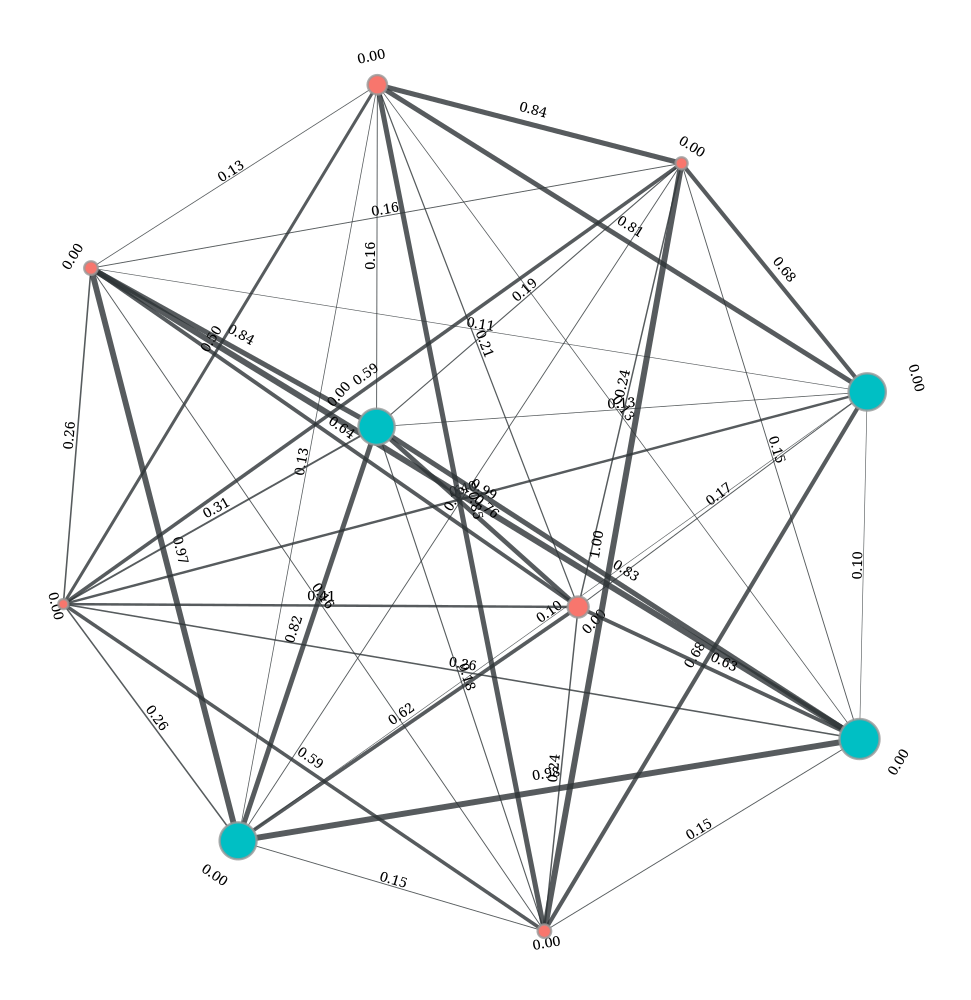

In [53]:
graft.graph.plot_undirected_weighted(
        g,
        node_color=g.y,
        node_size=g.x,
        edge_weight_text=True,
        edge_weight_width_scale=3.0,
        draw_options= dr_opts,
    )

---

In [60]:
def plot_cc_graph(cc_tt, cc_num):
    groups = cc_tt[cc_tt['cc_num'] == cc_num]
    
    edge_index = compute_time_difference(groups)
    edge_index = (np.array(edge_index)).astype(np.float64)
    edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
    theta = edge_index[:,2].mean()
    #theta = 1e7
    edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
    edge_index = edge_index.tolist()
    
    selected_indices1 = cc_tt[cc_tt['cc_num'] ==  cc_num].index
    is_fraud_values1 = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    g = torch_geometric.data.Data(
        edge_index = np.array(edge_index)[:,:2],
        edge_attr = np.array(edge_index)[:,-1],  # weight
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    
    
    unique_nodes = set(g.edge_index.reshape(-1).tolist())
    dict_map = {n:i for i,n in enumerate(unique_nodes)}
    source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
    edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])
    
    g = torch_geometric.data.Data(
        edge_index = edge_index_selected2,
        edge_attr = np.array(edge_index)[:,-1],
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    dr_opts = { 
        'output_size': (500,500),
        'edge_marker_size': 1,
      #'output':"ten-nodes.pdf",
    }
    graft.graph.plot_undirected_weighted(
        g,
        node_color=g.y,
        node_size=g.x,
        edge_weight_text=True,
        edge_weight_width_scale=3.0,
        draw_options= dr_opts,
    )
    


In [62]:
cc_num =  6.762340e+11
s = fraudTrain[fraudTrain['cc_num'] == 6.762340e+11]

In [63]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.025, 10, 400)

In [64]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

,trans_date_trans_time,amt
43548,2019-01-27 01:34:00,329.83
43755,2019-01-27 04:43:00,298.01
45318,2019-01-27 22:35:00,1043.38
45352,2019-01-27 22:53:00,1189.69
45384,2019-01-27 23:11:00,289.80
45388,2019-01-27 23:12:00,795.01
45476,2019-01-28 00:07:00,296.87
45605,2019-01-28 01:51:00,294.02
45738,2019-01-28 03:29:00,321.49
47720,2019-01-28 22:54:00,287.42


In [65]:
cc_tt = s[('2019-01-27' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-01-28')]
len(cc_tt), cc_tt.is_fraud.mean()

(6, 1.0)

In [66]:
groups = cc_tt[cc_tt['cc_num'] == cc_num]

In [67]:
edge_index = compute_time_difference(groups)

In [68]:
edge_index

[[43548, 43548, 0],
 [43548, 43755, 11340000000000],
 [43548, 45318, 75660000000000],
 [43548, 45352, 76740000000000],
 [43548, 45384, 77820000000000],
 [43548, 45388, 77880000000000],
 [43755, 43548, 11340000000000],
 [43755, 43755, 0],
 [43755, 45318, 64320000000000],
 [43755, 45352, 65400000000000],
 [43755, 45384, 66480000000000],
 [43755, 45388, 66540000000000],
 [45318, 43548, 75660000000000],
 [45318, 43755, 64320000000000],
 [45318, 45318, 0],
 [45318, 45352, 1080000000000],
 [45318, 45384, 2160000000000],
 [45318, 45388, 2220000000000],
 [45352, 43548, 76740000000000],
 [45352, 43755, 65400000000000],
 [45352, 45318, 1080000000000],
 [45352, 45352, 0],
 [45352, 45384, 1080000000000],
 [45352, 45388, 1140000000000],
 [45384, 43548, 77820000000000],
 [45384, 43755, 66480000000000],
 [45384, 45318, 2160000000000],
 [45384, 45352, 1080000000000],
 [45384, 45384, 0],
 [45384, 45388, 60000000000],
 [45388, 43548, 77880000000000],
 [45388, 43755, 66540000000000],
 [45388, 45318, 2220

In [69]:
edge_index = (np.array(edge_index)).astype(np.float64)
edge_index

array([[4.3548e+04, 4.3548e+04, 0.0000e+00],
       [4.3548e+04, 4.3755e+04, 1.1340e+13],
       [4.3548e+04, 4.5318e+04, 7.5660e+13],
       [4.3548e+04, 4.5352e+04, 7.6740e+13],
       [4.3548e+04, 4.5384e+04, 7.7820e+13],
       [4.3548e+04, 4.5388e+04, 7.7880e+13],
       [4.3755e+04, 4.3548e+04, 1.1340e+13],
       [4.3755e+04, 4.3755e+04, 0.0000e+00],
       [4.3755e+04, 4.5318e+04, 6.4320e+13],
       [4.3755e+04, 4.5352e+04, 6.5400e+13],
       [4.3755e+04, 4.5384e+04, 6.6480e+13],
       [4.3755e+04, 4.5388e+04, 6.6540e+13],
       [4.5318e+04, 4.3548e+04, 7.5660e+13],
       [4.5318e+04, 4.3755e+04, 6.4320e+13],
       [4.5318e+04, 4.5318e+04, 0.0000e+00],
       [4.5318e+04, 4.5352e+04, 1.0800e+12],
       [4.5318e+04, 4.5384e+04, 2.1600e+12],
       [4.5318e+04, 4.5388e+04, 2.2200e+12],
       [4.5352e+04, 4.3548e+04, 7.6740e+13],
       [4.5352e+04, 4.3755e+04, 6.5400e+13],
       [4.5352e+04, 4.5318e+04, 1.0800e+12],
       [4.5352e+04, 4.5352e+04, 0.0000e+00],
       [4.

In [70]:
np.array(edge_index)[:,1]

array([43548., 43755., 45318., 45352., 45384., 45388., 43548., 43755.,
       45318., 45352., 45384., 45388., 43548., 43755., 45318., 45352.,
       45384., 45388., 43548., 43755., 45318., 45352., 45384., 45388.,
       43548., 43755., 45318., 45352., 45384., 45388., 43548., 43755.,
       45318., 45352., 45384., 45388.])

In [71]:
edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
edge_index

array([[4.3548e+04, 4.3755e+04, 1.1340e+13],
       [4.3548e+04, 4.5318e+04, 7.5660e+13],
       [4.3548e+04, 4.5352e+04, 7.6740e+13],
       [4.3548e+04, 4.5384e+04, 7.7820e+13],
       [4.3548e+04, 4.5388e+04, 7.7880e+13],
       [4.3755e+04, 4.3548e+04, 1.1340e+13],
       [4.3755e+04, 4.5318e+04, 6.4320e+13],
       [4.3755e+04, 4.5352e+04, 6.5400e+13],
       [4.3755e+04, 4.5384e+04, 6.6480e+13],
       [4.3755e+04, 4.5388e+04, 6.6540e+13],
       [4.5318e+04, 4.3548e+04, 7.5660e+13],
       [4.5318e+04, 4.3755e+04, 6.4320e+13],
       [4.5318e+04, 4.5352e+04, 1.0800e+12],
       [4.5318e+04, 4.5384e+04, 2.1600e+12],
       [4.5318e+04, 4.5388e+04, 2.2200e+12],
       [4.5352e+04, 4.3548e+04, 7.6740e+13],
       [4.5352e+04, 4.3755e+04, 6.5400e+13],
       [4.5352e+04, 4.5318e+04, 1.0800e+12],
       [4.5352e+04, 4.5384e+04, 1.0800e+12],
       [4.5352e+04, 4.5388e+04, 1.1400e+12],
       [4.5384e+04, 4.3548e+04, 7.7820e+13],
       [4.5384e+04, 4.3755e+04, 6.6480e+13],
       [4.

In [72]:
theta = edge_index[:,2].mean()
theta

39328000000000.0

In [73]:
408111600000000 > 1e14

True

In [74]:
edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
edge_index = edge_index.tolist()
edge_index

[[43548.0, 43755.0, 0.749503582002083],
 [43548.0, 45318.0, 0.14604796570432013],
 [43548.0, 45352.0, 0.14209185991815573],
 [43548.0, 45384.0, 0.13824291600114744],
 [43548.0, 45388.0, 0.13803216918087047],
 [43755.0, 43548.0, 0.749503582002083],
 [43755.0, 45318.0, 0.19485959668690983],
 [43755.0, 45352.0, 0.18958129531362375],
 [43755.0, 45384.0, 0.1844459710677717],
 [43755.0, 45388.0, 0.18416478919574644],
 [45318.0, 43548.0, 0.14604796570432013],
 [45318.0, 43755.0, 0.19485959668690983],
 [45318.0, 45352.0, 0.9729122842137102],
 [45318.0, 45384.0, 0.9465583127739393],
 [45318.0, 45388.0, 0.9451153154732881],
 [45352.0, 43548.0, 0.14209185991815573],
 [45352.0, 43755.0, 0.18958129531362375],
 [45352.0, 45318.0, 0.9729122842137102],
 [45352.0, 45384.0, 0.9729122842137102],
 [45352.0, 45388.0, 0.9714291111424426],
 [45384.0, 43548.0, 0.13824291600114744],
 [45384.0, 43755.0, 0.1844459710677717],
 [45384.0, 45318.0, 0.9465583127739393],
 [45384.0, 45352.0, 0.9729122842137102],
 [4538

In [75]:
selected_indices1 = cc_tt[cc_tt['cc_num'] ==  cc_num].index
selected_indices1

Index([43548, 43755, 45318, 45352, 45384, 45388], dtype='int64')

In [76]:
is_fraud_values1 = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
is_fraud_values1

[1, 1, 1, 1, 1, 1]

In [77]:
    g = torch_geometric.data.Data(
        edge_index = np.array(edge_index)[:,:2],
        edge_attr = np.array(edge_index)[:,-1],  # weight
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )

In [78]:
g

Data(x=[6], edge_index=[30, 2], edge_attr=[30], y=[6])

In [79]:
unique_nodes = set(g.edge_index.reshape(-1).tolist())
unique_nodes

{43548.0, 43755.0, 45318.0, 45352.0, 45384.0, 45388.0}

In [80]:
dict_map = {n:i for i,n in enumerate(unique_nodes)}
dict_map

{45318.0: 0, 45352.0: 1, 45384.0: 2, 43755.0: 3, 45388.0: 4, 43548.0: 5}

In [81]:
source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
source, target

(array([43548., 43548., 43548., 43548., 43548., 43755., 43755., 43755.,
        43755., 43755., 45318., 45318., 45318., 45318., 45318., 45352.,
        45352., 45352., 45352., 45352., 45384., 45384., 45384., 45384.,
        45384., 45388., 45388., 45388., 45388., 45388.]),
 array([43755., 45318., 45352., 45384., 45388., 43548., 45318., 45352.,
        45384., 45388., 43548., 43755., 45352., 45384., 45388., 43548.,
        43755., 45318., 45384., 45388., 43548., 43755., 45318., 45352.,
        45388., 43548., 43755., 45318., 45352., 45384.]))

In [82]:
edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])
edge_index_selected2

tensor([[5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,
         2, 4, 4, 4, 4, 4],
        [3, 0, 1, 2, 4, 5, 0, 1, 2, 4, 5, 3, 1, 2, 4, 5, 3, 0, 2, 4, 5, 3, 0, 1,
         4, 5, 3, 0, 1, 2]])

In [83]:
    g = torch_geometric.data.Data(
        edge_index = edge_index_selected2,
        edge_attr = np.array(edge_index)[:,-1],
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )

In [84]:
g

Data(x=[6], edge_index=[2, 30], edge_attr=[30], y=[6])

In [85]:
dr_opts = { 
        'output_size': (500,500),
        'edge_marker_size': 1,
      #'output':"ten-nodes.pdf",
    }

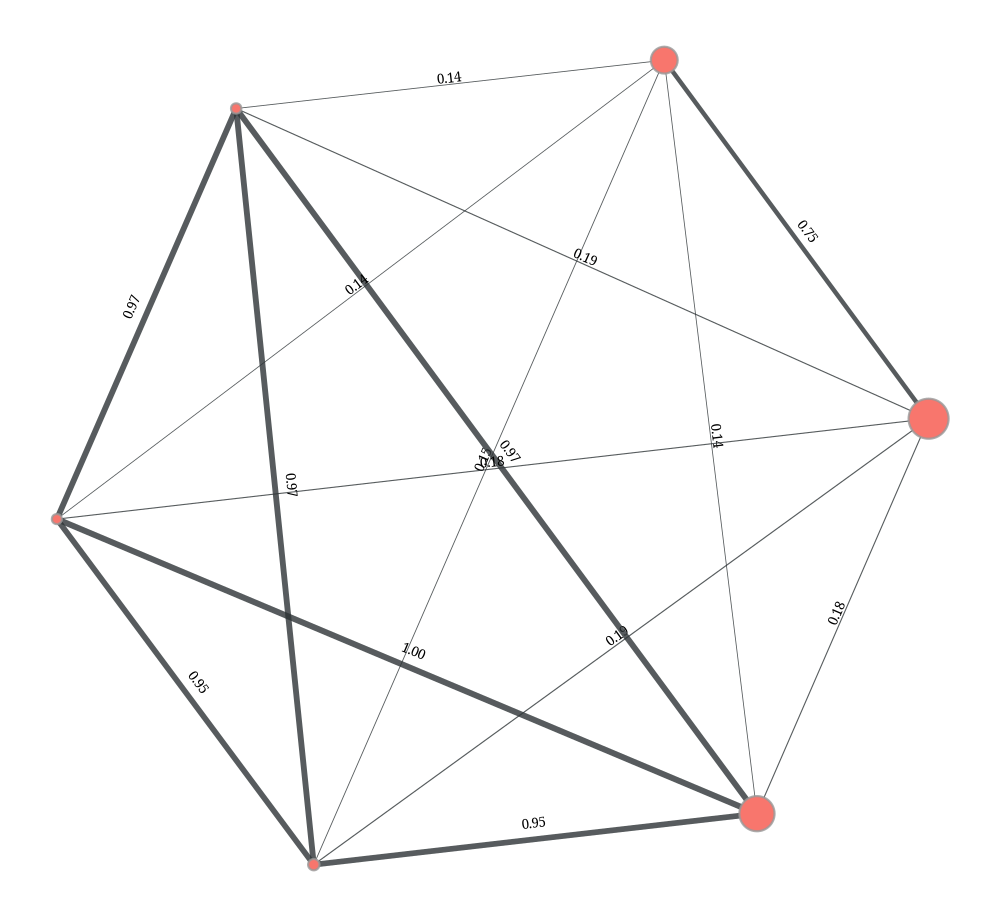

In [86]:
graft.graph.plot_undirected_weighted(
        g,
        node_color=g.y,
        node_size=g.x,
        edge_weight_text=True,
        edge_weight_width_scale=3.0,
        draw_options= dr_opts,
    )